# Hola a todos

In [1]:
# Importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Importar los datos

In [2]:
input = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [3]:
df = pd.read_csv(input, index_col=0) #leer el csv, index_col definir cual es la columna de índice
df.index.name = None #Sustituir el nombre de ID por un valor Nulo
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Reemplazamos los nombres de columna por:

    x1 = amount_credit
    x2 = gender
    x3 = education
    x4 = marital_status
    x5 = age
    x6-x11 = hry_sep, hry_aug, hry_jul, hry_jun, hry_may and hry_apl (Representan el historial de pagos pasados)
    x12-x17 = amt_sep, amt_aug, amt_jul, amt_jun, amt_may and amt_apl (Representan el monto del estado de cuenta)
    x18-x23 = paid_sep, paid_aug, paid_jul, paid_jun, paid_may and paid_apl (Representan el monto del pago anterior)



In [5]:
df.columns = ['amount_credit','gender','education','marital_status','age',
              'hry_sep', 'hry_aug', 'hry_jul', 'hry_jun', 'hry_may', 'hry_apl',
              'amt_sep', 'amt_aug', 'amt_jul', 'amt_jun', 'amt_may', 'amt_apl',
               'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apl','Y']
#Mostramos el Datafame con las nuevas columnas
df.head()

,amount_credit,gender,education,marital_status,age,hry_sep,hry_aug,hry_jul,hry_jun,hry_may,...,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


## 2.Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [6]:
#shape
print('Shape: ', df.shape)
#columns
print('Columns: ',df.columns)
#dtypes
print('Dtypes: ',df.dtypes)

Shape:  (30000, 24)
Columns:  Index(['amount_credit', 'gender', 'education', 'marital_status', 'age',
       'hry_sep', 'hry_aug', 'hry_jul', 'hry_jun', 'hry_may', 'hry_apl',
       'amt_sep', 'amt_aug', 'amt_jul', 'amt_jun', 'amt_may', 'amt_apl',
       'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apl',
       'Y'],
      dtype='object')
Dtypes:  amount_credit       int64
gender            float64
education         float64
marital_status    float64
age               float64
hry_sep           float64
hry_aug           float64
hry_jul           float64
hry_jun           float64
hry_may           float64
hry_apl           float64
amt_sep           float64
amt_aug           float64
amt_jul           float64
amt_jun           float64
amt_may           float64
amt_apl           float64
paid_sep          float64
paid_aug          float64
paid_jul          float64
paid_jun          float64
paid_may          float64
paid_apl          float64
Y                 float64
dtype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_credit   30000 non-null  int64  
 1   gender          29999 non-null  float64
 2   education       29998 non-null  float64
 3   marital_status  29998 non-null  float64
 4   age             29995 non-null  float64
 5   hry_sep         29997 non-null  float64
 6   hry_aug         29995 non-null  float64
 7   hry_jul         29993 non-null  float64
 8   hry_jun         29991 non-null  float64
 9   hry_may         29984 non-null  float64
 10  hry_apl         29986 non-null  float64
 11  amt_sep         29989 non-null  float64
 12  amt_aug         29989 non-null  float64
 13  amt_jul         29987 non-null  float64
 14  amt_jun         29985 non-null  float64
 15  amt_may         29983 non-null  float64
 16  amt_apl         29990 non-null  float64
 17  paid_sep        29992 non-null 

In [8]:
df.isna().sum().sort_values(ascending=False)

amt_may           17
hry_may           16
amt_jun           15
hry_apl           14
amt_jul           13
amt_sep           11
amt_aug           11
paid_jun          11
paid_may          11
amt_apl           10
hry_jun            9
paid_aug           9
paid_jul           8
paid_sep           8
hry_jul            7
hry_aug            5
age                5
paid_apl           5
Y                  3
hry_sep            3
marital_status     2
education          2
gender             1
amount_credit      0
dtype: int64

In [9]:
df.head()

,amount_credit,gender,education,marital_status,age,hry_sep,hry_aug,hry_jul,hry_jun,hry_may,...,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [10]:
df.tail()

,amount_credit,gender,education,marital_status,age,hry_sep,hry_aug,hry_jul,hry_jun,hry_may,...,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl,Y
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0
30000,50000,1.0,2.0,1.0,46.0,0.0,0.0,0.0,0.0,0.0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1.0


## 3.Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [11]:
#Total de registros vs registros nulos 
print('El total de registros es de: ' + str(df.shape[0]) +
      '\nEl total de valores nulos es de: ' + str(df.isna().sum().sum()))
#Porcentaje de registros nulos
#Porcentaje de registros nulos
print('Los valores nulos representan el ' + str(round(df.isna().sum().sum()/df.shape[0] * 100,2)) + '% del total de los valores')

El total de registros es de: 30000
El total de valores nulos es de: 196
Los valores nulos representan el 0.65% del total de los valores


In [12]:
pd.set_option('display.max_columns', None)

In [13]:
reg_nul = df[df.isnull().any(axis=1)].shape[0]

In [14]:
print('El total de registros es de: ' + str(df.shape[0]) +
      '\nEl total de registros nulos es de: ' + str(reg_nul))
#Porcentaje de registros nulos
print('Los valores nulos representan el ' + str(round(reg_nul/df.shape[0] * 100,2)) + '% del total de los valores')

El total de registros es de: 30000
El total de registros nulos es de: 42
Los valores nulos representan el 0.14% del total de los valores


In [15]:
df.isna().any()

amount_credit     False
gender             True
education          True
marital_status     True
age                True
hry_sep            True
hry_aug            True
hry_jul            True
hry_jun            True
hry_may            True
hry_apl            True
amt_sep            True
amt_aug            True
amt_jul            True
amt_jun            True
amt_may            True
amt_apl            True
paid_sep           True
paid_aug           True
paid_jul           True
paid_jun           True
paid_may           True
paid_apl           True
Y                  True
dtype: bool

### Eliminando registros nulos e Imputando los datos nulos

In [16]:
df_imp = df.copy()
df_sin_na = df.copy()

In [17]:
df_sin_na.head()

,amount_credit,gender,education,marital_status,age,hry_sep,hry_aug,hry_jul,hry_jun,hry_may,hry_apl,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [18]:
df_sin_na.dropna(inplace=True) #Eliminando los registros que tengan valores nulos

In [19]:
df_sin_na.shape

(29958, 24)

### Imputación de datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f749da35150>,
      dtype=object)

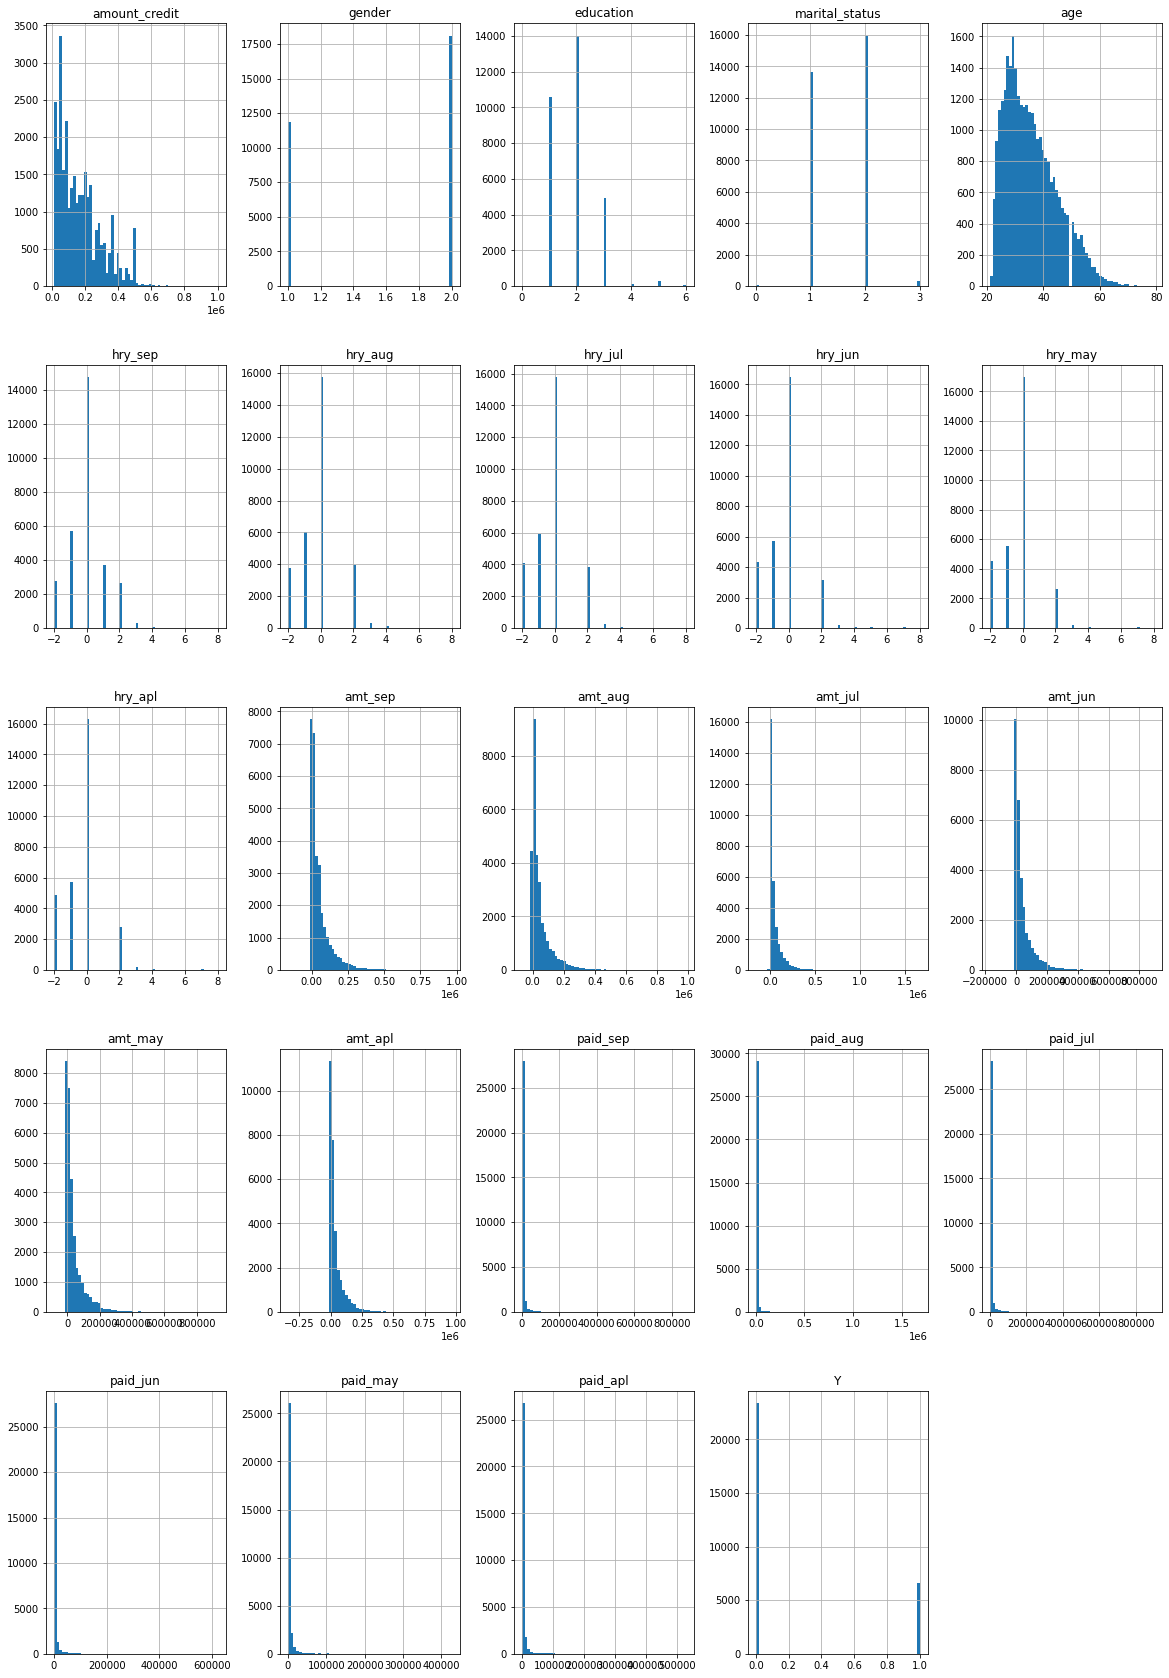

In [20]:
df.hist(bins = 60, figsize=(20,30))

Separar valores categóricos y numéricos

In [21]:
lista_cat = list(df_imp.iloc[:,1:11])
lista_cat.remove('age')

In [22]:
lista_cat

['gender',
 'education',
 'marital_status',
 'hry_sep',
 'hry_aug',
 'hry_jul',
 'hry_jun',
 'hry_may',
 'hry_apl']

In [23]:
df_imp_cat = df_imp[lista_cat]
df_imp_cat.head()

,gender,education,marital_status,hry_sep,hry_aug,hry_jul,hry_jun,hry_may,hry_apl
1,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0
2,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0
3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0


In [24]:
df_imp_num = df_imp.drop(df_imp_cat.columns,axis=1)
df_imp_num.drop(axis=1,columns='Y',inplace=True)
df_imp_num.head()

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Listas de variables cat y num

In [25]:
lista_cat = df_imp_cat.columns
lista_num = df_imp_num.columns


In [26]:
print('Variables categóricas: ', lista_cat)
print('--------------------------------')
print('Variables numéricas: ', lista_num)

Variables categóricas:  Index(['gender', 'education', 'marital_status', 'hry_sep', 'hry_aug',
       'hry_jul', 'hry_jun', 'hry_may', 'hry_apl'],
      dtype='object')
--------------------------------
Variables numéricas:  Index(['amount_credit', 'age', 'amt_sep', 'amt_aug', 'amt_jul', 'amt_jun',
       'amt_may', 'amt_apl', 'paid_sep', 'paid_aug', 'paid_jul', 'paid_jun',
       'paid_may', 'paid_apl'],
      dtype='object')


In [27]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)

cat_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='most_frequent'))
])

num_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='median'))
])


In [28]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("cat", cat_pipeline, lista_cat),
    ("num", num_pipeline, lista_num)
], remainder='passthrough');

In [29]:
lista_total = [*lista_cat, *lista_num,'Y']
lista_total

['gender',
 'education',
 'marital_status',
 'hry_sep',
 'hry_aug',
 'hry_jul',
 'hry_jun',
 'hry_may',
 'hry_apl',
 'amount_credit',
 'age',
 'amt_sep',
 'amt_aug',
 'amt_jul',
 'amt_jun',
 'amt_may',
 'amt_apl',
 'paid_sep',
 'paid_aug',
 'paid_jul',
 'paid_jun',
 'paid_may',
 'paid_apl',
 'Y']

In [30]:
df_imp = pd.DataFrame(transformer.fit_transform(df_imp),columns=lista_total)


In [31]:
df_imp.head()

,gender,education,marital_status,hry_sep,hry_aug,hry_jul,hry_jun,hry_may,hry_apl,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl,Y
0,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Eliminamos los registros nulos de la variable salida **Y**

In [32]:
df_imp.dropna(inplace=True)

In [33]:
df_imp.isnull().sum().sum()

0

Creamos dos dataFrames, uno donde se eliminaron los registros nulos desde un inicio y otro donde se imputaron los valores
df_imp -> DataFrame valores imputados
df_sin_na -> DataFrame con valores nulos eliminados

## 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [34]:
df_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,29997.0,1.603794,0.489116,1.0,1.0,2.0,2.0,2.0
education,29997.0,1.853085,0.790317,0.0,1.0,2.0,2.0,6.0
marital_status,29997.0,1.551955,0.521963,0.0,1.0,2.0,2.0,3.0
hry_sep,29997.0,-0.016768,1.123708,-2.0,-1.0,0.0,0.0,8.0
hry_aug,29997.0,-0.133813,1.197088,-2.0,-1.0,0.0,0.0,8.0
hry_jul,29997.0,-0.166517,1.195840,-2.0,-1.0,0.0,0.0,8.0
hry_jun,29997.0,-0.220822,1.168970,-2.0,-1.0,0.0,0.0,8.0
hry_may,29997.0,-0.266293,1.132990,-2.0,-1.0,0.0,0.0,8.0
hry_apl,29997.0,-0.291096,1.149861,-2.0,-1.0,0.0,0.0,8.0
amount_credit,29997.0,167496.072274,129748.803871,10000.0,50000.0,140000.0,240000.0,1000000.0


In [35]:
df_sin_na.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_credit,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
gender,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
education,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
marital_status,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
age,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
hry_sep,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
hry_aug,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
hry_jul,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
hry_jun,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
hry_may,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


Imputando valores fuera de rango para **education**

In [36]:
df_imp["education"].unique()

array([2., 1., 3., 5., 4., 6., 0.])

In [37]:
moda_education = int(df_imp["education"].mode())

In [38]:
df_imp["education"].median()

2.0

In [39]:
df_imp["education"] = df_imp["education"].apply(lambda x: (moda_education) if x > 4 else x)
df_imp["education"] = df_imp["education"].apply(lambda x: (moda_education) if x < 1 else x)

In [40]:
df_imp["education"].unique()

array([2., 1., 3., 4.])

Imputando valores fuera de rango para **marital_status**

In [41]:
moda_marital = int(df_imp["marital_status"].mode())

In [42]:
df_imp["marital_status"] = df_imp["marital_status"].apply(lambda x: (moda_marital) if x < 1 else x)

In [43]:
df_imp["marital_status"].unique()

array([1., 2., 3.])

In [44]:
df_sin_na["education"] = df_sin_na["education"].apply(lambda x: (moda_education) if x > 4 else x)
df_sin_na["education"] = df_sin_na["education"].apply(lambda x: (moda_education) if x < 1 else x)
df_sin_na["marital_status"] = df_sin_na["marital_status"].apply(lambda x: (moda_marital) if x < 1 else x)

In [45]:
df_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,29997.0,1.603794,0.489116,1.0,1.0,2.0,2.0,2.0
education,29997.0,1.819215,0.707404,1.0,1.0,2.0,2.0,4.0
marital_status,29997.0,1.555556,0.518129,1.0,1.0,2.0,2.0,3.0
hry_sep,29997.0,-0.016768,1.123708,-2.0,-1.0,0.0,0.0,8.0
hry_aug,29997.0,-0.133813,1.197088,-2.0,-1.0,0.0,0.0,8.0
hry_jul,29997.0,-0.166517,1.195840,-2.0,-1.0,0.0,0.0,8.0
hry_jun,29997.0,-0.220822,1.168970,-2.0,-1.0,0.0,0.0,8.0
hry_may,29997.0,-0.266293,1.132990,-2.0,-1.0,0.0,0.0,8.0
hry_apl,29997.0,-0.291096,1.149861,-2.0,-1.0,0.0,0.0,8.0
amount_credit,29997.0,167496.072274,129748.803871,10000.0,50000.0,140000.0,240000.0,1000000.0


In [46]:
df_sin_na.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_credit,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
gender,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
education,29958.0,1.819180,0.707461,1.0,1.00,2.0,2.00,4.0
marital_status,29958.0,1.555344,0.518115,1.0,1.00,2.0,2.00,3.0
age,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
hry_sep,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
hry_aug,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
hry_jul,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
hry_jun,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
hry_may,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


Como se puede observar hay variables que despues de la imputación la medias y la desviación estandar tienen cambio, sería interesante revsar el coeficiente de variación debido a que esta es una medida de dispersión que revisa la variación de acuerdo a la media, por ejemplo la edad posee aproximadamente un 25% de coeficiente de variación, por lo que es bastante, esto pasa debido a que el rango es muy amplio, ya que el minimo es 21 y el maximo es 79.

Ahora hay que analizar que aunque existe en este caso medidas de centralidad y de dispersion , es necesaria la dispersión por la naturaleza del negocio, debido a que cada crédito posee pagos de diferentes montos de acuerdo a los creditos originales.

## 5.Realiza el conteo de las variables categóricas

In [47]:
lista_cat

Index(['gender', 'education', 'marital_status', 'hry_sep', 'hry_aug',
       'hry_jul', 'hry_jun', 'hry_may', 'hry_apl'],
      dtype='object')

## 6.Escala los datos, si consideras necesario

In [48]:
df_imp_pca = df_imp.copy()
df_sna_pca = df_sin_na.copy()

In [49]:
df_imp_pca.drop(columns = lista_cat, inplace=True)
df_imp_pca.drop(columns ='Y',inplace=True)

In [50]:
df_sna_pca.drop(columns = lista_cat,inplace=True)
df_sna_pca.drop(columns ='Y',inplace=True)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Definimos variable scaler que almacena el método StandardScaler().
scaled_imp = scaler.fit_transform(df_imp_pca) #scaled va a almacenar los valores de la estandarización de los valores.
scaled_sna = scaler.fit_transform(df_sna_pca)

In [52]:
scaled_df_imp = pd.DataFrame(scaled_imp, columns=df_imp_pca.columns)
scaled_df_sna = pd.DataFrame(scaled_sna, columns=df_sna_pca.columns)

In [53]:
scaled_df_imp.head()

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl
0,-1.136801,-1.245888,-0.642561,-0.647432,-0.668024,-0.672527,-0.663098,-0.652783,-0.341876,-0.227099,-0.296765,-0.308069,-0.314126,-0.293397
1,-0.366068,-1.028903,-0.659279,-0.666779,-0.639285,-0.621667,-0.606269,-0.598026,-0.341876,-0.213601,-0.239968,-0.244239,-0.314126,-0.180899
2,-0.597288,-0.160961,-0.298625,-0.493936,-0.482443,-0.449766,-0.417229,-0.391694,-0.250224,-0.191901,-0.239968,-0.244239,-0.248675,-0.012151
3,-0.905581,0.164517,-0.057561,-0.013342,0.032799,-0.232414,-0.186772,-0.156648,-0.221122,-0.169377,-0.228609,-0.237856,-0.244159,-0.237148
4,-0.905581,2.334370,-0.578679,-0.611352,-0.161231,-0.347035,-0.348179,-0.331547,-0.221122,1.334949,0.271200,0.266405,-0.269030,-0.255204


In [54]:
scaled_df_sna.head()

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


## 7.Reduce las dimensiones con PCA, si consideras necesario. 

In [55]:
from sklearn.decomposition import PCA
pcs_imp_a = PCA() #Creamos variable pcs que almacena el método PCA().
pcs_sna_b = PCA()

pcs_imp = pcs_imp_a.fit_transform(scaled_df_imp) ##variable pcs_t almacena los valores aplicados de la transformación de pcs
pcs_sna = pcs_sna_b.fit_transform(scaled_df_sna)

In [56]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df_imp.columns))] 
pcs_labels

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14']

In [57]:
pcsSummary_df_imp = pd.DataFrame({'Desviación estándar': np.sqrt(pcs_imp_a.explained_variance_),
                             'Proporción de varianza': pcs_imp_a.explained_variance_ratio_,
                             'Proporción Acumulada': np.cumsum(pcs_imp_a.explained_variance_ratio_)
                             })

pcsSummary_df_imp = pcsSummary_df_imp.T
pcsSummary_df_imp.columns = pcs_labels
pcsSummary_df_imp.round(4)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.4330,1.3100,1.0223,0.9617,0.9400,0.9342,0.8829,0.8524,0.8410,0.5142,0.2665,0.2027,0.1592,0.1525
Proporción de varianza,0.4228,0.1226,0.0747,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Proporción Acumulada,0.4228,0.5454,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [58]:
pcsSummary_df_sna = pd.DataFrame({'Desviación estándar': np.sqrt(pcs_sna_b.explained_variance_),
                             'Proporción de varianza': pcs_sna_b.explained_variance_ratio_,
                             'Proporción Acumulada': np.cumsum(pcs_sna_b.explained_variance_ratio_)
                             })

pcsSummary_df_sna = pcsSummary_df_sna.T
pcsSummary_df_sna.columns = pcs_labels
pcsSummary_df_sna.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proporción de varianza,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Proporción Acumulada,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [59]:
total_var = scaled_df_imp.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_df_imp.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_df_imp.var().cumsum() / total_var) *100
})


,Porcentaje Varianza,Porcentaje Varianza Acumulado
amount_credit,7.142857,7.142857
age,7.142857,14.285714
amt_sep,7.142857,21.428571
amt_aug,7.142857,28.571429
amt_jul,7.142857,35.714286
amt_jun,7.142857,42.857143
amt_may,7.142857,50.000000
amt_apl,7.142857,57.142857
paid_sep,7.142857,64.285714
paid_aug,7.142857,71.428571


In [60]:
pcsSummary_df_imp = pd.DataFrame({
'% varianza explicada': np.round(pcs_imp_a.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs_imp_a.explained_variance_ratio_) * 100
},
index = pcs_labels)
pcsSummary_df_imp

,% varianza explicada,% varianza acumulada
PC1,42.28,42.279613
PC2,12.26,54.537525
PC3,7.47,62.002910
PC4,6.61,68.609432
PC5,6.31,74.920995
PC6,6.23,81.154272
PC7,5.57,86.722351
PC8,5.19,91.912227
PC9,5.05,96.963529
PC10,1.89,98.852246


In [61]:
pcsSummary_df_sna = pd.DataFrame({
'% varianza explicada': np.round(pcs_sna_b.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs_sna_b.explained_variance_ratio_) * 100
},
index = pcs_labels)
pcsSummary_df_sna

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


In [62]:
pcsComponents_df_imp = pd.DataFrame(pcs_imp_a.components_.round(4),#datos pcs.components nos da los pesos de cada uno de los componentes
                                columns=pcs_labels,#columnas Son 14 columnas, las cuales hacen referencia a cada uno de los componentes: PC1, PC2...PC10
                                index=scaled_df_imp.columns #índice (ID) Las filas son 10 también, las cuales hacen referencia a las variables originales
                                )
pcsComponents_df_imp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
amount_credit,0.1655,0.0327,0.3724,0.3832,0.3883,0.3915,0.3885,0.3807,0.1352,0.1168,0.1281,0.1169,0.1138,0.1055
age,0.3008,0.0719,-0.1909,-0.1747,-0.1269,-0.1204,-0.1060,-0.0942,0.3833,0.4083,0.3922,0.3495,0.3040,0.3235
amt_sep,-0.3788,-0.8696,-0.0343,-0.0019,0.0347,0.0340,0.0338,0.0185,0.1735,0.2008,0.1221,0.0622,-0.0601,-0.0505
amt_aug,-0.2002,0.3384,-0.0640,0.0074,0.0605,0.0748,0.0397,-0.0703,0.3614,0.3463,0.2453,-0.0942,-0.6092,-0.3671
amt_jul,0.0347,-0.0390,0.0412,0.0831,0.1142,0.0286,-0.1069,-0.1649,0.2261,0.1505,-0.2393,-0.5794,-0.1928,0.6575
amt_jun,-0.0782,0.0713,-0.0441,-0.0290,0.0988,0.0144,-0.0990,0.0697,0.0399,0.4073,-0.1078,-0.4994,0.6033,-0.4110
amt_may,0.1109,-0.0786,0.0082,-0.0323,-0.1213,0.1264,-0.0076,0.0080,-0.2011,-0.2796,0.7852,-0.4620,0.0147,0.0255
amt_apl,-0.0481,0.0281,0.0094,-0.1357,0.0929,0.0392,0.0497,0.0000,-0.7490,0.5780,0.0692,0.0776,-0.1635,0.1820
paid_sep,-0.8219,0.3309,0.0103,0.0172,-0.0187,0.0189,0.0234,0.0587,0.0220,-0.1117,0.1524,0.0986,0.2535,0.3159
paid_aug,-0.0291,-0.0091,0.5668,0.3868,0.1228,-0.2053,-0.4200,-0.4888,-0.0565,0.0508,0.1449,0.1240,0.0600,-0.0992


In [63]:
pcsComponents_df_imp.abs().idxmax() #Nos interesa buscar los máximos por filas, no por columnas. Por eso usamos idxmax
#Si quisieramos especidicar en una sola columna, llamaríamos el nombre del componente (PCA1)


PC1     paid_sep
PC2      amt_sep
PC3     paid_aug
PC4     paid_apl
PC5     paid_apl
PC6     paid_jul
PC7     paid_may
PC8     paid_jul
PC9      amt_apl
PC10     amt_apl
PC11     amt_may
PC12     amt_jul
PC13     amt_aug
PC14     amt_jul
dtype: object

In [64]:
pcsComponents_df_imp.PC5.abs().nlargest(5)

paid_apl         0.5279
paid_jun         0.4958
paid_jul         0.4848
amount_credit    0.3883
age              0.1269
Name: PC5, dtype: float64

### Correlación entre variables

In [65]:
corrmat = df_imp.corr().abs()
k = 10
cols = corrmat.nlargest(k, 'Y')['Y'].index
cols

Index(['Y', 'hry_sep', 'hry_aug', 'hry_jul', 'hry_jun', 'hry_may', 'hry_apl',
       'amount_credit', 'paid_sep', 'paid_aug'],
      dtype='object')

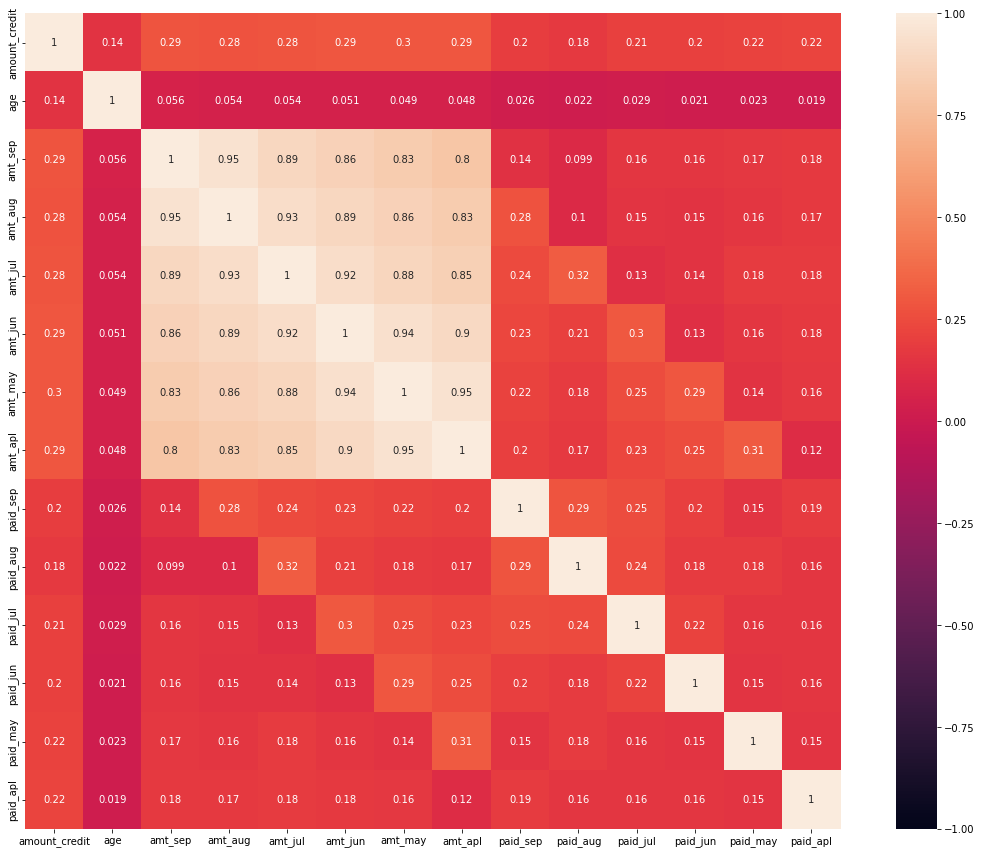

In [66]:
corrmat = scaled_df_imp.corr().abs()

f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.
sns.heatmap(corrmat, vmax = 1, vmin = -1, square = True, annot = True)

## 8.Elabora los histogramas de los atributos para visualizar su distribución

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74968f17d0>,
      dtype=object)

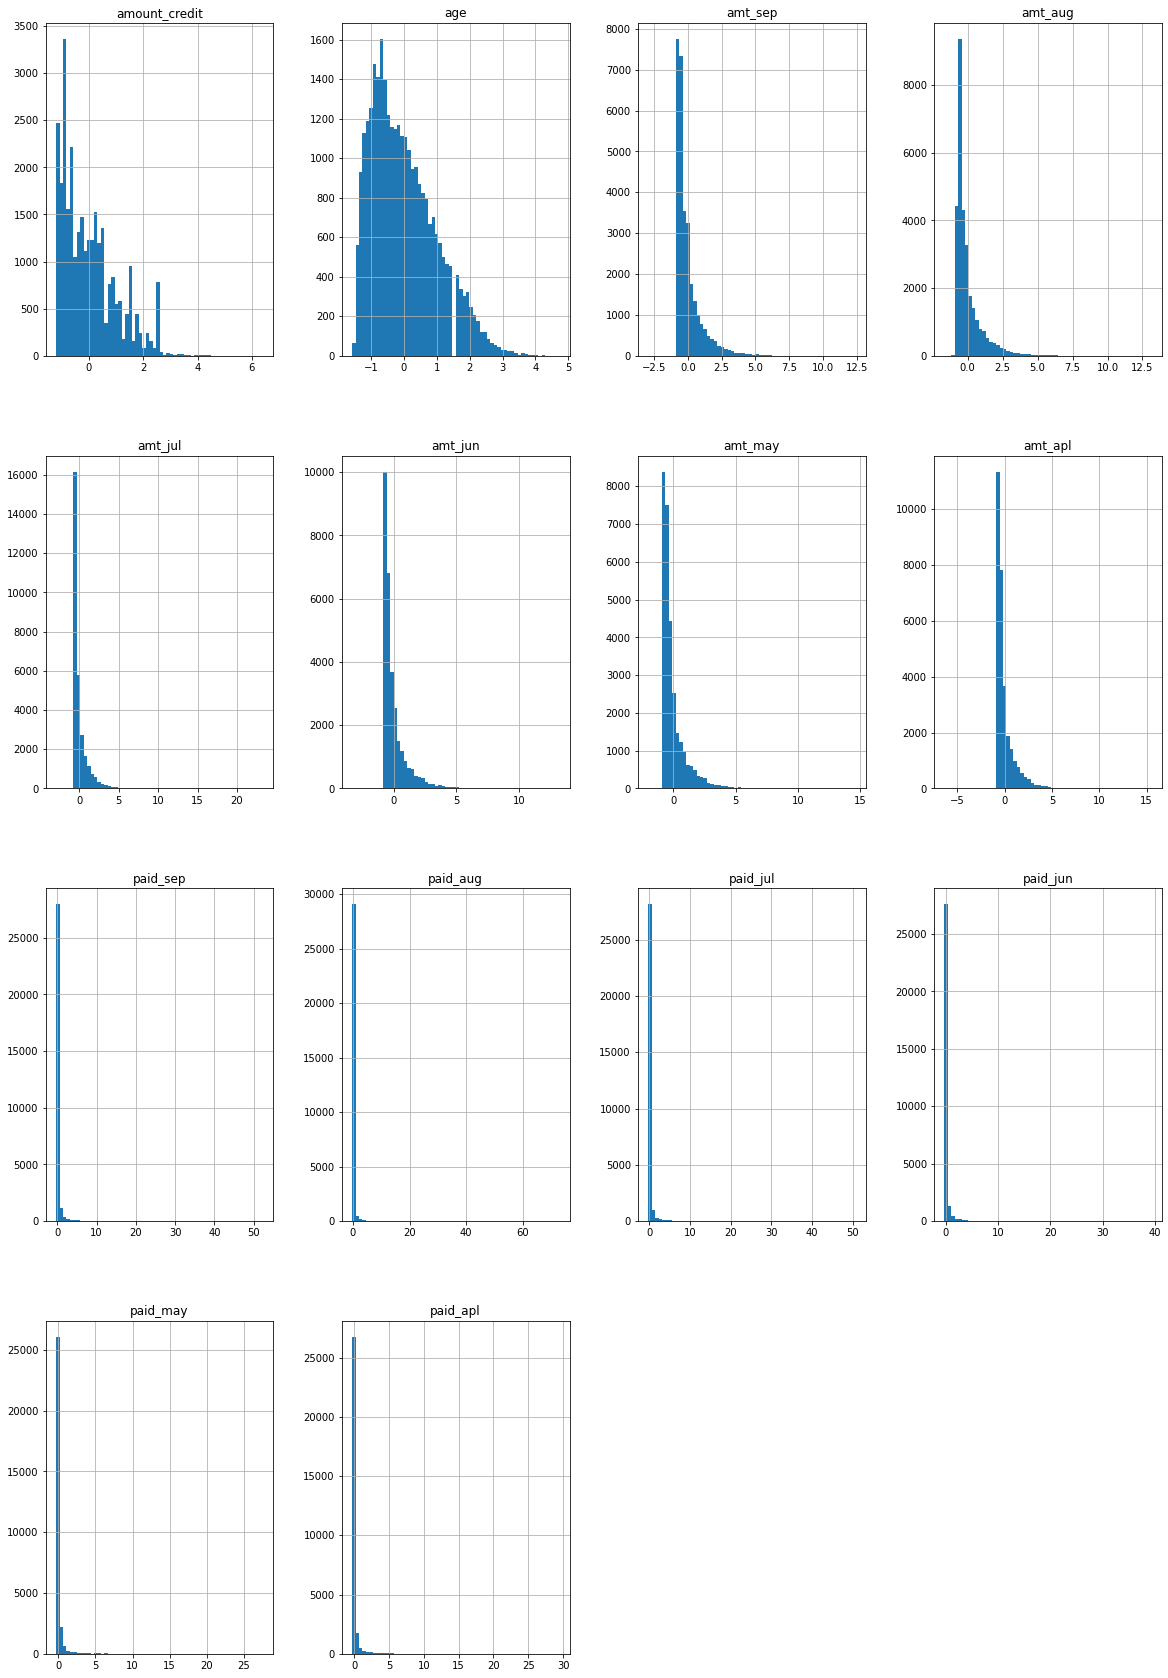

In [67]:
scaled_df_imp.hist(bins = 60, figsize=(20,30))

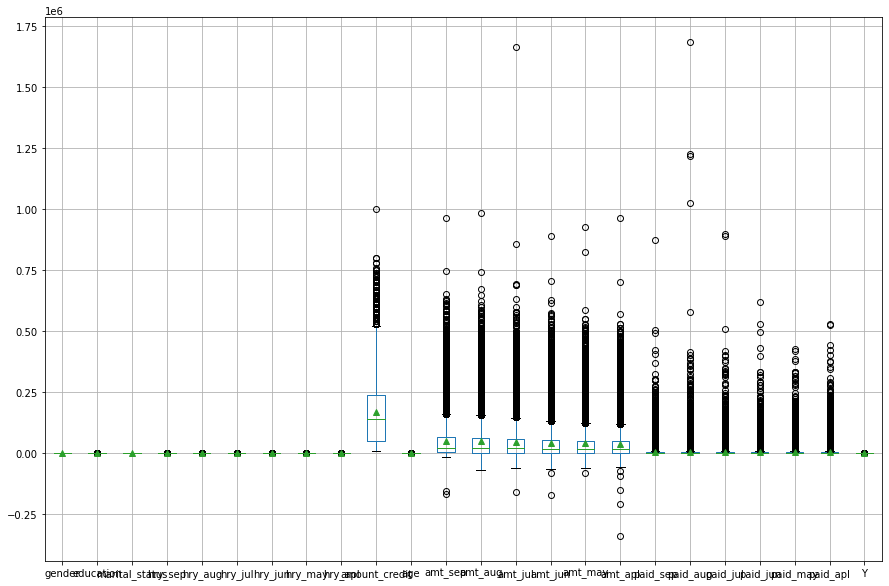

In [ ]:
val_atp = df_imp.boxplot(figsize = (15,10),showmeans = True)
val_atp.plot()
plt.show()

## 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

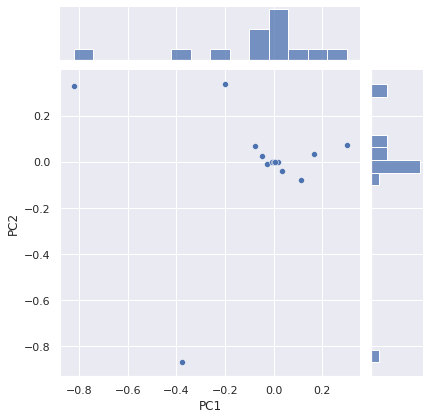

In [78]:
#sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
sns.jointplot(x = "PC1", y = "PC2", kind = "scatter", data = pcsComponents_df_imp)
plt.show()


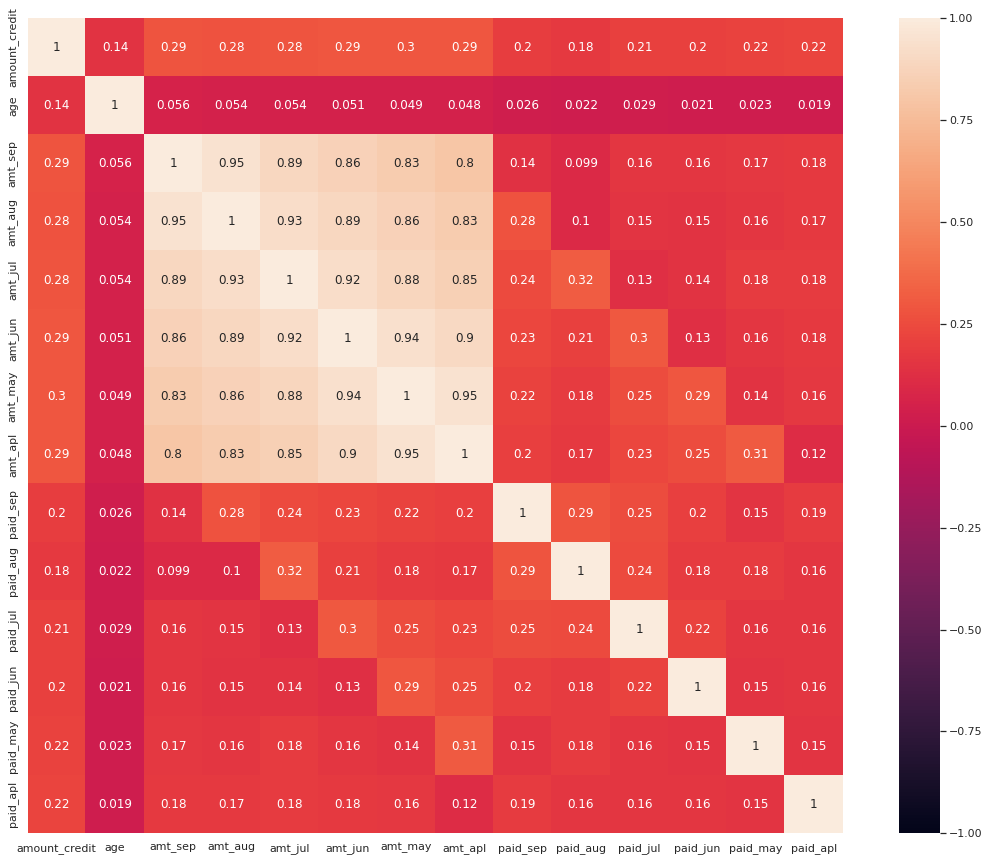

In [81]:
corrmat = scaled_df_imp.corr().abs()

f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.
sns.heatmap(corrmat, vmax = 1, vmin = -1, square = True, annot = True)

## 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones

Se puede observar en el gráfico último que los componentes no tienen mucha correlación, esto es significativo para el análisis.

Se puede observar que del PC1 al PC5 se tiene una variación del 70% apróximadamente , por lo que las variables más significativas se encuentran acá, esto reduciendo la dimensionalidad y mejorando el rendimiento del modelo.

Ádemas como se observa arriba en la matriz de correlaciones estas son las variables que poseen menos correlaciones, esto permitirá hacer que el entrenamiento del modelo sea más justo y balanceado.